In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

a = cv2.imread("in58.png")
img1 = a.copy()
img1[:,:,0] = cv2.normalize(a[:,:,0], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img1[:,:,1] = cv2.normalize(a[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img1[:,:,2] = cv2.normalize(a[:,:,2], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
g_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
uneq_img=g_img
g_img = cv2.equalizeHist(g_img)
#g_img = cv2.normalize(g_img, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

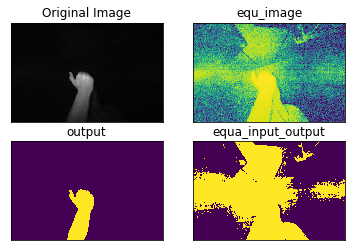

In [4]:
img = g_img
img2=uneq_img
# Otsu's thresholding after Gaussian filtering
ret,th4 = cv2.threshold(uneq_img,35,255,cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(g_img,(5,5),0)
ret1,th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur2 = cv2.GaussianBlur(th4,(5,5),0)
ret2,th2 = cv2.threshold(blur2,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
titles = ['Original Image','equ_image','output','equa_input_output']
images = [a,g_img,th2,th1]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

[ 157  136   76  142 6905]


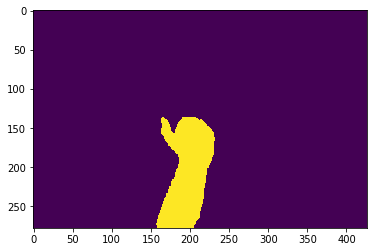

In [5]:
stretch_near = cv2.resize(th2, (255, 255),  
               interpolation = cv2.INTER_NEAREST)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(th2, connectivity=4)
sizes = stats[:, -1]

max_label = 1
max_size = sizes[1]
for i in range(2, nb_components):
    if sizes[i] > max_size:
        max_label = i
        max_size = sizes[i]

img3 = np.zeros(output.shape)
img3[output == max_label] = 255
plt.imshow(img3)
cv2.imwrite("in58o.png",img3)
print(stats[max_label])
